##**Optimizacion de Siembra de Papaya y Piña**

Una empresa agropecuaria posee terrenos agricolas para siembra de papaya y piña, productos que generan una utilidad de 8 millones y 9 millones respectivamente por hectarea. Cuentan con una disponibilidad de de agua de 540 litros, 500 kg de abono y 800 libras de fertilizante.
Si se conoce que para sembrar papaya y piña se necesita de agua 6 y 9 litros, de abono 5 y 10 kg, y de fertilizante 10 y 8 libras respectivamente.
¿Cuantas hectareas deberia sembrar de cada producto de tal manera que obtenga la mayor utilidad, teniendo en cuenta las condiciones actuales?

In [ ]:
#instalamos la libreria para LP
#!pip install cvxpy
import cvxpy as cp

In [7]:
# Variables de decision
# x: papaya, y: piña
x = cp.Variable(nonneg = True) #x>=0 Ha de cultivo de papaya
y = cp.Variable(nonneg = True) #y>=0 Ha de cultivo de piña

In [8]:
# Funcion Objetivo (FO)
utilidad = 8000000 * x + 9000000 * y
FO = cp.Maximize(utilidad)

In [9]:
# Restricciones
restricciones = [6 * x + 9 * y <= 540, # Restriccion de agua
                 5 * x + 10 * y <= 500, # Restriccion de abono
                 10 * x + 8 * y <= 800,] # Restriccion de fertilizante

In [10]:
# Crear el problema de LP
problema = cp.Problem(FO, restricciones)

In [11]:
# Resolver el problema
problema.solve()

677142857.510814

In [13]:
# Imprimir los resultados
print("Hectareas de papaya a sembrar: {:.1f}".format(x.value))
print("Hectareas de piña a sembrar: {:.1f}".format(y.value))
print("Utilidad maxima: $ {:.0f}".format(utilidad.value))

Hectareas de papaya a sembrar: 68.6
Hectareas de piña a sembrar: 14.3
Utilidad maxima: $ 677142858


## **Graficando los resultados**

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# crear un rango de valores para x1
x_values = np.linspace(0, 100, 100)

In [16]:
# calcular los limites de las restricciones en funcion del valor anterior x_values
y_agua = (540 - 6 * x_values) / 9 # despejo las y de las restricciones y evaluo
y_abono = (500 - 5 * x_values) / 10
y_fertilizante = (800 - 10 * x_values) / 8

In [17]:
# utilizar los resultados optimos de una de las soluciones anteriores (por ejemplo con cvxpy)
x_optimo = x.value
y_optimo = y.value

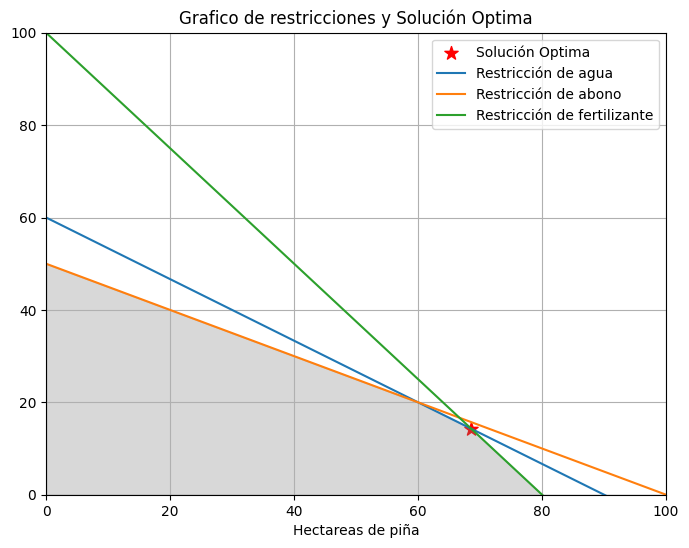

In [21]:
# crear el grafico
plt.figure(figsize = (8, 6))
plt.scatter(x_optimo, y_optimo, c='red', marker='*', s=100, label='Solución Optima')
plt.plot(x_values, y_agua, label='Restricción de agua')
plt.plot(x_values, y_abono, label='Restricción de abono')
plt.plot(x_values, y_fertilizante, label='Restricción de fertilizante')
plt.fill_between(x_values, np.minimum(np.minimum(y_agua, y_abono), y_fertilizante), color='gray', alpha=0.3)
plt.xlabel('Hectareas de papaya')
plt.xlabel('Hectareas de piña')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.title('Grafico de restricciones y Solución Optima')
plt.show()